In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# Download NLTK data (run once)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\This
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\This
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\This
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Step 1: Load and preprocess the dataset
# Load the CSV file (adjust the path to your local file)
data = pd.read_csv('data/emails.csv')

Column Headers:
['text', 'spam']

Number of Columns: 2

Data Types:
text    object
spam     int64
dtype: object

Null Values in Each Column:
text    0
spam    0
dtype: int64


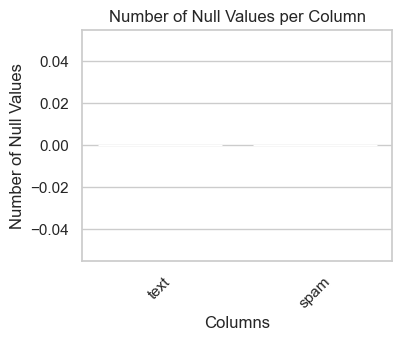


Label Distribution (including NaN):
spam
0    4360
1    1368
Name: count, dtype: int64


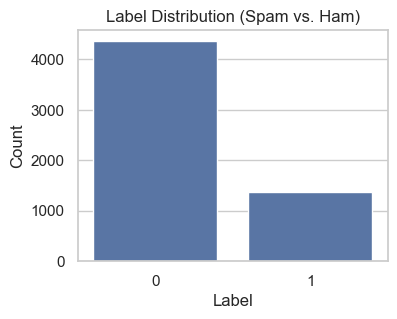


Dataset Shape (rows, columns): (5728, 2)

Sample of First 5 Rows:
                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1

Unique Values in 'label' Column:
[1 0]


In [16]:
# Set plot style for better visuals
sns.set(style="whitegrid")

# Inspect column headers
print("Column Headers:")
print(data.columns.tolist())
print("\nNumber of Columns:", len(data.columns))

# Check data types
print("\nData Types:")
print(data.dtypes)

# Check for null values
print("\nNull Values in Each Column:")
null_counts = data.isnull().sum()
print(null_counts)

# Visualize null values
plt.figure(figsize=(4, 3))
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.title('Number of Null Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45)
plt.show()

# Check data imbalance in the 'label' column
# Assuming the label column is named 'label' (adjust if different)
print("\nLabel Distribution (including NaN):")
label_counts = data['spam'].value_counts(dropna=False)
print(label_counts)

# Visualize label distribution
plt.figure(figsize=(4, 3))
sns.countplot(x='spam', data=data)
plt.title('Label Distribution (Spam vs. Ham)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Basic dataset statistics
print("\nDataset Shape (rows, columns):", data.shape)
print("\nSample of First 5 Rows:")
print(data.head())

# Check unique values in 'label' to identify inconsistencies
print("\nUnique Values in 'label' Column:")
print(data['spam'].unique())

In [17]:
# Text preprocessing function
def preprocess_text(text):
    # Handle non-string inputs (e.g., NaN or float)
    if not isinstance(text, str):
        text = '' if pd.isna(text) else str(text)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming (reduce words to root form)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # Join tokens back into a string
    return ' '.join(tokens)

# Apply preprocessing to the text column
data['processed_text'] = data['text'].apply(preprocess_text)

In [19]:
# Step 2: Feature extraction with TF-IDF
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Convert text to TF-IDF features
X = vectorizer.fit_transform(data['processed_text']).toarray()
y = data['spam'].values

# Verify no NaN in y
print("\nNumber of NaN in y:", np.isnan(y).sum())


Number of NaN in y: 0


In [20]:
# Step 3: Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 4009
Validation set size: 859
Test set size: 860


In [21]:
# Step 4: Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [22]:
# Step 5: Evaluate the model
# Validation set
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

print("\nValidation Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1-Score: {val_f1:.4f}")

# Test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")


Validation Metrics:
Accuracy: 0.9732
Precision: 0.9897
Recall: 0.9019
F1-Score: 0.9438

Test Metrics:
Accuracy: 0.9733
Precision: 0.9857
Recall: 0.9119
F1-Score: 0.9474


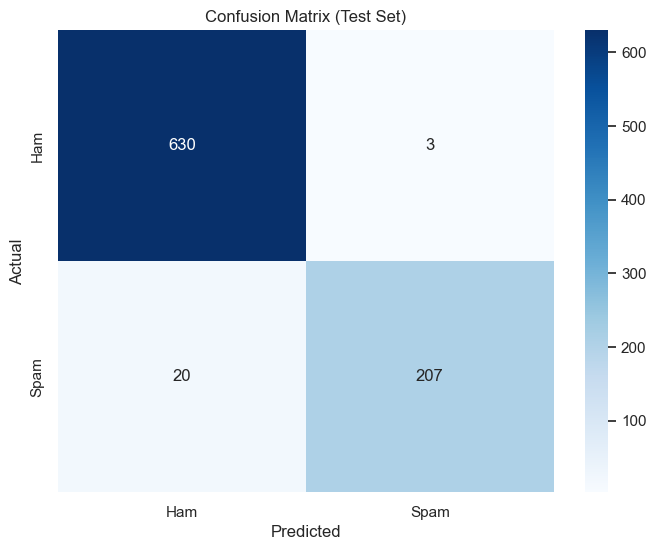

In [23]:
# Step 6: Visualize the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
# Step 7: Save the model and vectorizer
joblib.dump(model, 'spam_classifier_model.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [25]:
# Example: Predict a new email
sample_email = "Win a free iPhone now! Click here to claim your prize!"
processed_email = preprocess_text(sample_email)
email_vector = vectorizer.transform([processed_email]).toarray()
prediction = model.predict(email_vector)
print("\nSample Email Prediction:")
print("Spam" if prediction[0] == 1 else "Ham")


Sample Email Prediction:
Spam
